<a href="https://colab.research.google.com/github/GavinKoli/Language-Detection/blob/main/Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.simplefilter("ignore")

In [2]:
!wget https://raw.githubusercontent.com/basil-b2s/Language-Detector/master/language_detection.csv

--2024-10-29 00:13:16--  https://raw.githubusercontent.com/basil-b2s/Language-Detector/master/language_detection.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1911016 (1.8M) [text/plain]
Saving to: ‘language_detection.csv’

language_detection. 100%[===================>]   1.82M  --.-KB/s    in 0.05s   

2024-10-29 00:13:17 (36.5 MB/s) - ‘language_detection.csv’ saved [1911016/1911016]



In [3]:
data = pd.read_csv("language_detection.csv")

In [4]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [5]:
data["Language"].value_counts()

,count
Language,
English,1385
French,1014
Spanish,819
Portugeese,739
Italian,698
Russian,692
Sweedish,676
Malayalam,594
Dutch,546


### Separating Independent and Dependent features

In [6]:
X = data["Text"]
y = data["Language"]

### Label Encoding


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Text Preprocessing

In [8]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

### Bag of Words

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [10]:
X.shape

(10337, 39404)

### Train Test Splitting

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Model Training and Prediction


In [12]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [13]:
y_pred = model.predict(x_test)

### Model Evaluation


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
target_names = ['English','French','Spanish','Portugeese','Italian','Russian','Sweedish','Malayalam','Dutch','Arabic','Turkish','German','Tamil','Danish','Kannada','Greek','Hindi']
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred,target_names=target_names)

In [15]:
print("Accuracy is :",ac)

Accuracy is : 0.9787234042553191


In [16]:
print(cr)

              precision    recall  f1-score   support

     English       1.00      0.99      0.99        96
      French       1.00      0.94      0.97        93
     Spanish       0.99      0.99      0.99       113
  Portugeese       0.90      1.00      0.95       278
     Italian       0.99      0.99      0.99       201
     Russian       0.99      0.99      0.99        86
    Sweedish       1.00      0.95      0.98        65
   Malayalam       1.00      0.93      0.96        14
       Dutch       0.99      0.99      0.99       143
      Arabic       1.00      0.96      0.98        75
     Turkish       1.00      0.99      1.00       110
      German       0.99      0.99      0.99       168
       Tamil       1.00      0.98      0.99       126
      Danish       0.98      0.99      0.98       159
     Kannada       0.99      0.97      0.98       148
       Greek       1.00      0.98      0.99        93
       Hindi       1.00      0.91      0.95       100

    accuracy              

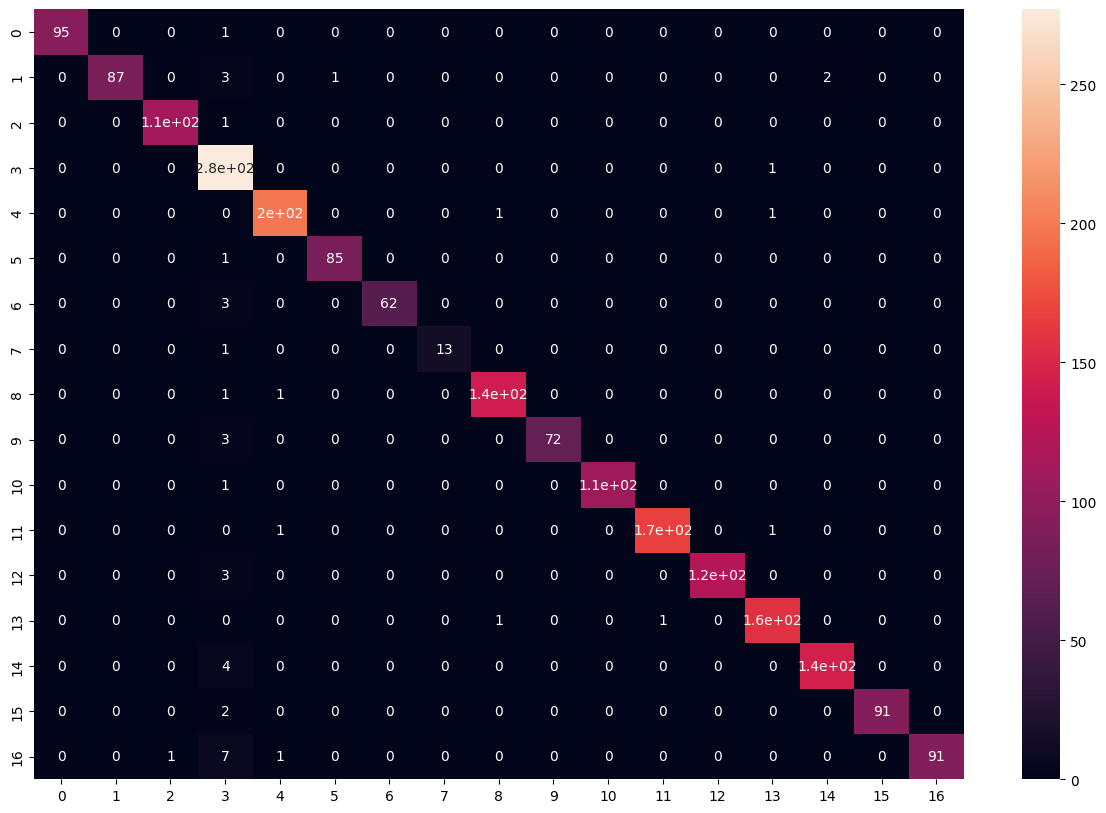

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### Model Saving

In [18]:
pickle.dump(cv, open("transform.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))

### Predicting with some more data


In [19]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])

In [20]:
# French
predict("Un voyage de mille kilomètres commence par un seul pas")


The langauge is in French


In [21]:
# Arabic
predict("رحلة الألف ميل تبدأ بخطوة واحدة")

The langauge is in Arabic


In [22]:
# Spanish
predict("Un viaje de mil millas comienza con un solo paso")

The langauge is in Spanish


In [23]:
# Malayalam
predict("ആയിരം മൈലുകളുള്ള യാത്ര ആരംഭിക്കുന്നത് ഒരൊറ്റ ചുവടുവെപ്പിൽ നിന്നാണ്")

The langauge is in Malayalam


In [24]:
# Russian
predict("Путешествие в тысячу миль начинается с одного шага")

The langauge is in Russian


In [25]:
predict('hello')

The langauge is in English
